In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
!pip install seaborn

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
import PIL
import cv2

In [4]:
image_dir = Path('E:\Lian\S2\Datasets\Braille Dataset\Braille Dataset')

In [5]:
dir_list = list(image_dir.glob('*.jpg'))

In [6]:
image_count = len(dir_list)
image_count

1560

In [7]:
name_list = []
for i in dir_list:
    name_list.append(os.path.basename(i)[0])

In [8]:
#opens images and puts into a list
images = []
for dir in dir_list:
    I = cv2.imread(str(dir))
    images.append(I)

In [9]:
#turn both lists in numpy arrays
images_list = np.array(images)
name_list = np.array(name_list).T #transpose - convert columns to rows

In [10]:
#encodes name_list and normalizes image_list
le = LabelEncoder()
name_list = le.fit_transform(name_list)

#covert image to 0 to 255 (pixel information)
images_list = images_list / 255.0 
print(images_list[0])

[[[0.76078431 0.76078431 0.76078431]
  [0.8        0.8        0.8       ]
  [0.80784314 0.80784314 0.80784314]
  ...
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]]

 [[0.75686275 0.75686275 0.75686275]
  [0.69411765 0.69411765 0.69411765]
  [0.7372549  0.7372549  0.7372549 ]
  ...
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]]

 [[0.78039216 0.78039216 0.78039216]
  [0.79607843 0.79607843 0.79607843]
  [0.76470588 0.76470588 0.76470588]
  ...
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]]

 ...

 [[0.76862745 0.76862745 0.76862745]
  [0.77254902 0.77254902 0.77254902]
  [0.76470588 0.76470588 0.76470588]
  ...
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]]

 [[0.77254902 0.77254902 0.77254902]
  [0.77647059 0.77647059 0.77647059]


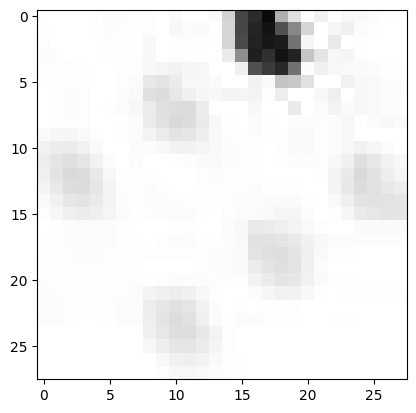

In [11]:
plt.imshow(images_list[1])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(images_list, name_list, test_size=0.2, random_state=42)

# Creating model: Trial 1: Adam Optimizer

In [14]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),   
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),   
    keras.layers.BatchNormalization(),

    keras.layers.Flatten(),
    
    keras.layers.Dense(units=576, activation="relu"),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(units=288, activation="relu"),

    keras.layers.Dense(units=26, activation="softmax") #output layer
])
model.build((None, 28, 28, 3))

In [15]:
from tensorflow.keras.utils import plot_model
!pip install pydot

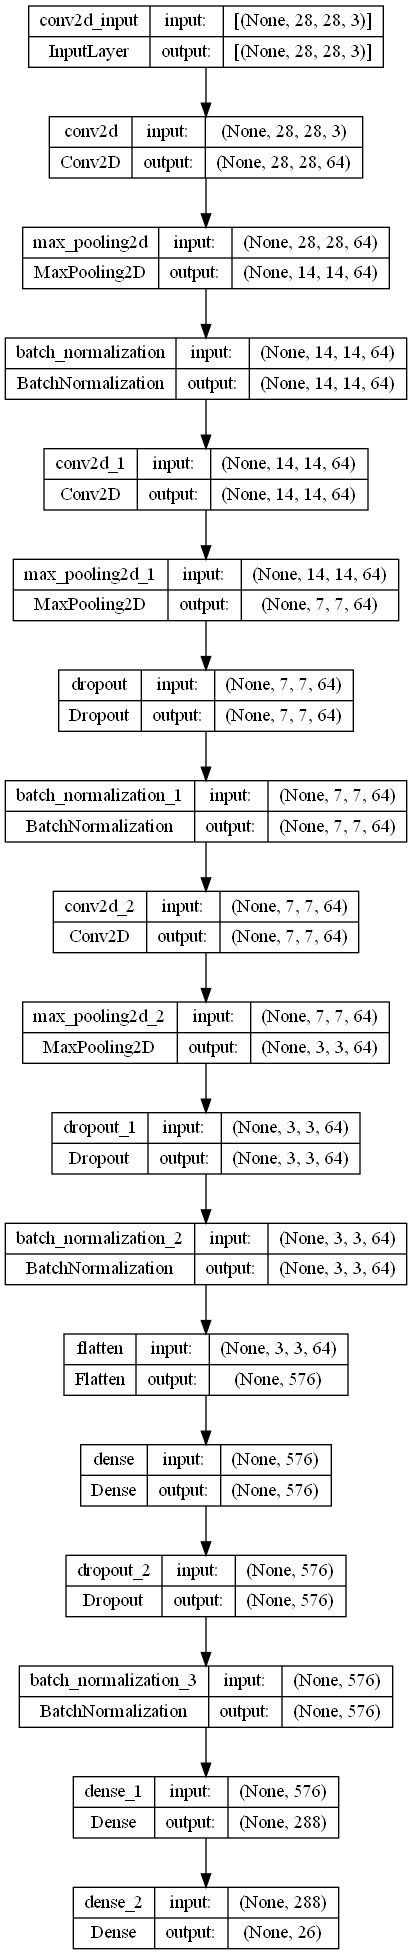

In [16]:
plot_model(model, to_file='model_1_braille_architecture.png', show_shapes=True, show_layer_names=True)

In [17]:
model.compile(optimizer="Adam", loss="SparseCategoricalCrossentropy", metrics=["sparse_categorical_accuracy"])

if you use categorical-cross-entropy you need one-hot encoding, and if you use sparse-categorical-cross-entropy you encode as normal integers.

In [18]:
from keras.callbacks import EarlyStopping

In [38]:
# es1 = EarlyStopping(patience=20, monitor="val_sparse_categorical_accuracy", mode="auto")
# es2 = EarlyStopping(patience=20, monitor="val_loss", mode="auto")

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=30, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=20, min_lr=1e-6)

#The neural network will stop fitting if it gets 20 epochs without converge
history = model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    validation_split=0.3,
                    # callbacks=[es1, es2]
                    callbacks=[early_stopping, reduce_lr],
                    batch_size=128
                   )

Epoch 1/100
7/7 [==============================] - 1s 158ms/step - loss: 1.2567 - sparse_categorical_accuracy: 0.6266 - val_loss: 3.8075 - val_sparse_categorical_accuracy: 0.0427 - lr: 5.0000e-04
Epoch 2/100
7/7 [==============================] - 1s 137ms/step - loss: 1.1433 - sparse_categorical_accuracy: 0.6793 - val_loss: 4.1061 - val_sparse_categorical_accuracy: 0.0427 - lr: 5.0000e-04
Epoch 3/100
7/7 [==============================] - 1s 138ms/step - loss: 1.0250 - sparse_categorical_accuracy: 0.7102 - val_loss: 4.3886 - val_sparse_categorical_accuracy: 0.0427 - lr: 5.0000e-04
Epoch 4/100
7/7 [==============================] - 1s 146ms/step - loss: 0.9385 - sparse_categorical_accuracy: 0.7228 - val_loss: 4.7187 - val_sparse_categorical_accuracy: 0.0427 - lr: 5.0000e-04
Epoch 5/100
7/7 [==============================] - 1s 140ms/step - loss: 0.8329 - sparse_categorical_accuracy: 0.7640 - val_loss: 5.2008 - val_sparse_categorical_accuracy: 0.0427 - lr: 5.0000e-04
Epoch 6/100
7/7 [===

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                        

In [39]:
time = np.arange(1, len(history.history['loss'])+1)

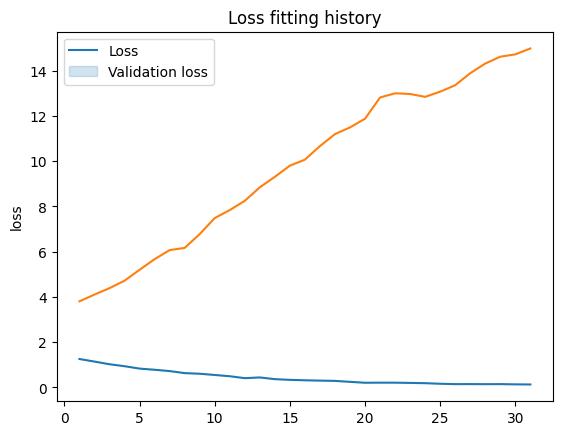

In [40]:
sns.lineplot(data=history.history, x=time, y='loss')
sns.lineplot(data=history.history, x=time, y='val_loss')
plt.title('Loss fitting history')
plt.legend(labels=['Loss', 'Validation loss'])
plt.show()

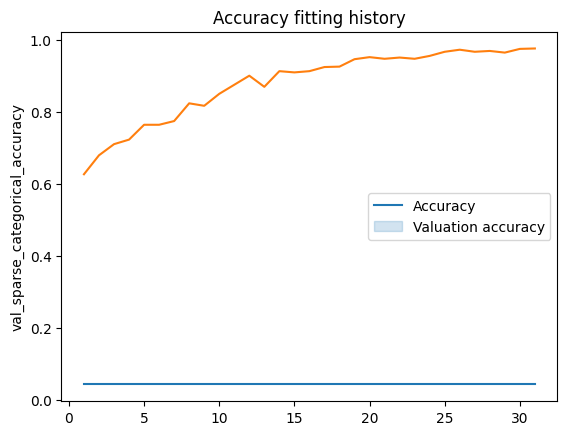

In [41]:
sns.lineplot(data=history.history, x=time, y='val_sparse_categorical_accuracy')
sns.lineplot(data=history.history, x=time, y='sparse_categorical_accuracy')
plt.title('Accuracy fitting history')
plt.legend(labels=['Accuracy', 'Valuation accuracy'])
plt.show()

In [42]:
print("Adam Optimizer")
model.evaluate(X_test, y_test)

Adam Optimizer
10/10 [==============================] - 0s 13ms/step - loss: 3.7348 - sparse_categorical_accuracy: 0.0385


[3.7348291873931885, 0.03846153989434242]

# Optimization Model 1

In [25]:
!pip install --upgrade tensorflow-model-optimization

In [26]:
import tensorflow_model_optimization as tfmot  # TensorFlow Model Optimization toolkit

In [27]:
# model_save_path = 'cnn_model.h5'
model_save_path = 'cnn_model1_braille.keras'
model.save(model_save_path)

# Get the size of the model in bytes
model_size = os.path.getsize(model_save_path)
print(f"Model size: {model_size / 1024:.2f} KB")

Model size: 6973.58 KB


In [28]:
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.ConstantSparsity(0.1, begin_step=0, frequency=100)
  }

pruned_model = prune_low_magnitude(model, **pruning_params)
pruned_model.compile(optimizer="Adam", loss="SparseCategoricalCrossentropy", metrics=["sparse_categorical_accuracy"])
pruned_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_conv2d   (None, 28, 28, 64)       9666      
 (PruneLowMagnitude)                                             
                                                                 
 prune_low_magnitude_max_poo  (None, 14, 14, 64)       1         
 ling2d (PruneLowMagnitude)                                      
                                                                 
 prune_low_magnitude_batch_n  (None, 14, 14, 64)       257       
 ormalization (PruneLowMagni                                     
 tude)                                                           
                                                                 
 prune_low_magnitude_conv2d_  (None, 14, 14, 64)       73794     
 1 (PruneLowMagnitude)                                           
                                                        

# Pruning

In [29]:
import time
start_pruning_time = time.time()

# Train the model
history = pruned_model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    validation_split=0.3,
                    callbacks=[early_stopping, reduce_lr, tfmot.sparsity.keras.UpdatePruningStep()],
                    batch_size=128                           
                    # callbacks=[es1, es2, tfmot.sparsity.keras.UpdatePruningStep()]
                )

end_time = time.time()
total_time = end_time - start_pruning_time 
print(f"Total time: {total_time:.2f} seconds")

Epoch 1/100
7/7 [==============================] - 8s 234ms/step - loss: 2.1293 - sparse_categorical_accuracy: 0.3631 - val_loss: 3.3072 - val_sparse_categorical_accuracy: 0.0427 - lr: 0.0010
Epoch 2/100
7/7 [==============================] - 1s 151ms/step - loss: 1.6165 - sparse_categorical_accuracy: 0.5304 - val_loss: 3.5007 - val_sparse_categorical_accuracy: 0.0427 - lr: 0.0010
Epoch 3/100
7/7 [==============================] - 1s 163ms/step - loss: 1.2705 - sparse_categorical_accuracy: 0.6220 - val_loss: 3.8130 - val_sparse_categorical_accuracy: 0.0427 - lr: 0.0010
Epoch 4/100
7/7 [==============================] - 1s 154ms/step - loss: 1.0765 - sparse_categorical_accuracy: 0.6816 - val_loss: 4.1557 - val_sparse_categorical_accuracy: 0.0427 - lr: 5.0000e-04
Total time: 11.16 seconds


# Evaluate the model with testing data

In [30]:
# Evaluate the model on the test data
pruned_test_loss, pruned_test_acc = pruned_model.evaluate(X_test, y_test)

print(f"Test accuracy: {pruned_test_acc}")

10/10 [==============================] - 0s 15ms/step - loss: 3.2859 - sparse_categorical_accuracy: 0.0385
Test accuracy: 0.03846153989434242


In [31]:
model_save_path = 'cnn_pruned_model1_braille.keras'
pruned_model.save(model_save_path)

# Get the size of the model in bytes
model_size = os.path.getsize(model_save_path)
print(f"Model size after pruning: {model_size / 1024:.2f} KB")

Model size after pruning: 9294.80 KB


In [32]:
model_for_export = tfmot.sparsity.keras.strip_pruning(pruned_model)
converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
tflite_model = converter.convert()

# Save the TFLite model to a file
model_save_path = 'pruned_model1_braille.tflite'
with open(model_save_path, 'wb') as f:
    f.write(tflite_model)

model_size = os.path.getsize(model_save_path)
print(f"Model size after pruning + convert to tf lite: {model_size / 1024:.2f} KB")

INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmp2ngycpek\assets


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmp2ngycpek\assets


Model size after pruning + convert to tf lite: 2292.22 KB


# Post Training Quantization

In [33]:
# Strip the pruning wrappers to finalize the pruned model
final_model = tfmot.sparsity.keras.strip_pruning(pruned_model)
final_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                        

In [34]:
# Convert to TensorFlow Lite model with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(final_model)

# Set quantization parameters
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Default optimization includes quantization

# Optionally, if you have representative data, you can enable full integer quantization:
# Provide a representative dataset for better accuracy in quantization
def representative_dataset():
    for data in X_test.take(100):  # use a small sample of your data <<< what if we change this to 1000? to all data? 70rb? how?
        yield [tf.dtypes.cast(data, tf.float32)] # can we change this to integer?

converter.representative_dataset = representative_dataset
converter.target_spec.supported_types = [tf.float16]  # This can be int8 as well, hm... << nope, error

# Convert the model
quantized_tflite_model = converter.convert()

# Save the quantized model to a file
with open('quantized_pruned_proposed_method_braille.tflite', 'wb') as f:
    f.write(quantized_tflite_model)

# To load and use the TFLite model later:
interpreter = tf.lite.Interpreter(model_path='quantized_pruned_proposed_method_braille.tflite')
interpreter.allocate_tensors()

INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmpw22q76gk\assets


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmpw22q76gk\assets


In [35]:
final_model.compile(optimizer="Adam", loss="SparseCategoricalCrossentropy", metrics=["sparse_categorical_accuracy"])

In [37]:
start_quantization_time = time.time()

history = final_model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    validation_split=0.3,
                    # callbacks=[es1, es2, tfmot.sparsity.keras.UpdatePruningStep()])
                    callbacks=[early_stopping, reduce_lr, tfmot.sparsity.keras.UpdatePruningStep()],
                    batch_size=128                           
        )

end_time = time.time()
total_time = end_time - start_quantization_time 
print(f"Total time: {total_time:.2f} seconds")

Epoch 1/100
7/7 [==============================] - 3s 205ms/step - loss: 1.6654 - sparse_categorical_accuracy: 0.5074 - val_loss: 3.5369 - val_sparse_categorical_accuracy: 0.0427 - lr: 0.0010
Epoch 2/100
7/7 [==============================] - 1s 137ms/step - loss: 1.2555 - sparse_categorical_accuracy: 0.6346 - val_loss: 3.8752 - val_sparse_categorical_accuracy: 0.0427 - lr: 0.0010
Epoch 3/100
7/7 [==============================] - 1s 136ms/step - loss: 1.0805 - sparse_categorical_accuracy: 0.6816 - val_loss: 4.2546 - val_sparse_categorical_accuracy: 0.0427 - lr: 0.0010
Epoch 4/100
7/7 [==============================] - 1s 141ms/step - loss: 0.8704 - sparse_categorical_accuracy: 0.7514 - val_loss: 4.6644 - val_sparse_categorical_accuracy: 0.0427 - lr: 5.0000e-04
Total time: 5.54 seconds


In [ ]:
# Evaluate the model on the test data
final_test_loss, final_test_acc = final_model.evaluate(X_test, y_test)

print(f"Test accuracy: {final_test_acc}")

In [ ]:
model_size = os.path.getsize('quantized_pruned_proposed_method_braille.tflite')
print(f"Model size after quantization: {model_size / 1024:.2f} KB")